In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import plotly.express as px

# Exploration

In [2]:
df = pd.read_csv("data/german_credit_data.csv")
df.shape

(1000, 10)

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [5]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
df.sample(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
107,32,male,2,own,little,moderate,6078,12,car
578,27,male,2,own,little,moderate,2820,36,car
340,24,female,2,free,little,moderate,5743,24,education


## NA Values

In [7]:
df_missing = df.isna().sum().to_frame(name="Counts")
df_missing["Percentage"] = round((df_missing["Counts"] / df.shape[0])* 100, 2)
df_missing

,Counts,Percentage
Age,0,0.0
Sex,0,0.0
Job,0,0.0
Housing,0,0.0
Saving accounts,183,18.3
Checking account,394,39.4
Credit amount,0,0.0
Duration,0,0.0
Purpose,0,0.0


## Columnwise exploration

### Age

<Axes: >

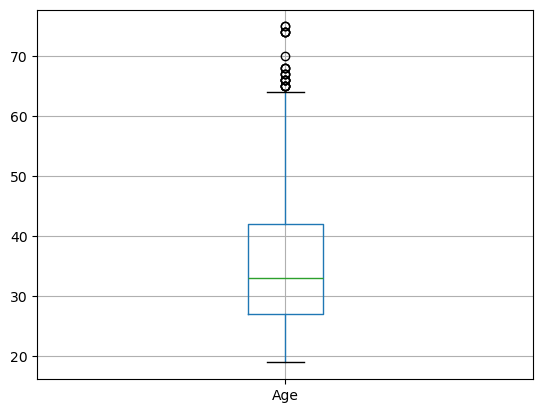

In [8]:
df.boxplot("Age")

### Sex

In [9]:
df["Sex"].value_counts()

Sex
male      690
female    310
Name: count, dtype: int64

### Job

#### Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled

In [10]:
df["Job"].value_counts().to_frame()

,count
Job,
2,630
1,200
3,148
0,22


### Housing

In [11]:
df["Housing"].value_counts().to_frame()

,count
Housing,
own,713
rent,179
free,108


### Saving Account

In [12]:
df["Saving accounts"].value_counts(dropna=False).to_frame()

,count
Saving accounts,
little,603
NaN,183
moderate,103
quite rich,63
rich,48


In [13]:
df["Saving accounts"].mode()

0    little
Name: Saving accounts, dtype: object

### Checking Account

In [14]:
df["Checking account"].value_counts(dropna=False).to_frame()

,count
Checking account,
NaN,394
little,274
moderate,269
rich,63


In [15]:
df["Checking account"].mode()

0    little
Name: Checking account, dtype: object

### Credit Amount

In [16]:
df[["Credit amount", "Duration"]].describe()

,Credit amount,Duration
count,1000.000000,1000.000000
mean,3271.258000,20.903000
std,2822.736876,12.058814
min,250.000000,4.000000
25%,1365.500000,12.000000
50%,2319.500000,18.000000
75%,3972.250000,24.000000
max,18424.000000,72.000000


In [17]:
%matplotlib inline

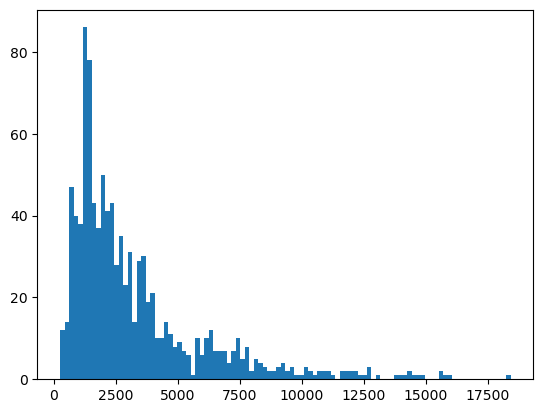

In [18]:
plt.hist(df["Credit amount"],bins=100)
plt.show()

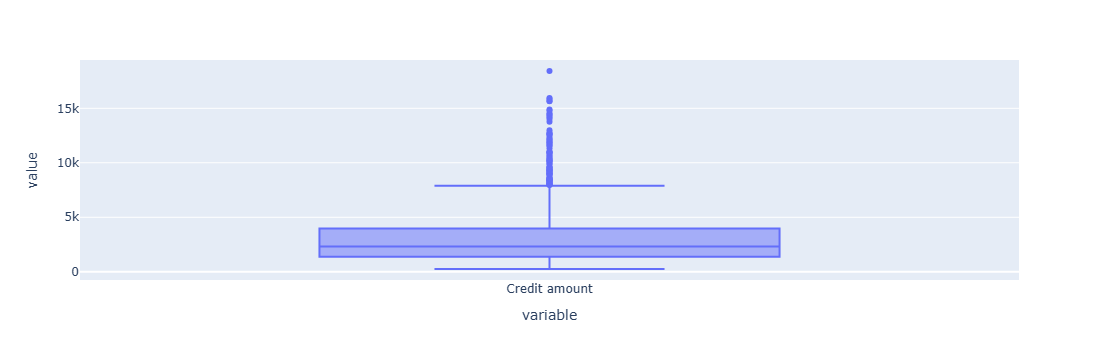

In [19]:
fig = px.box(df["Credit amount"])
fig.show()

### Duration

#### (numeric, in month)

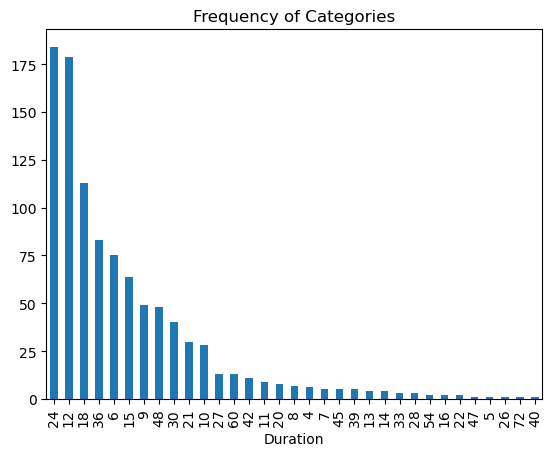

In [20]:
df["Duration"].value_counts().plot(kind='bar', title='Frequency of Categories')
plt.show()


### Purpose

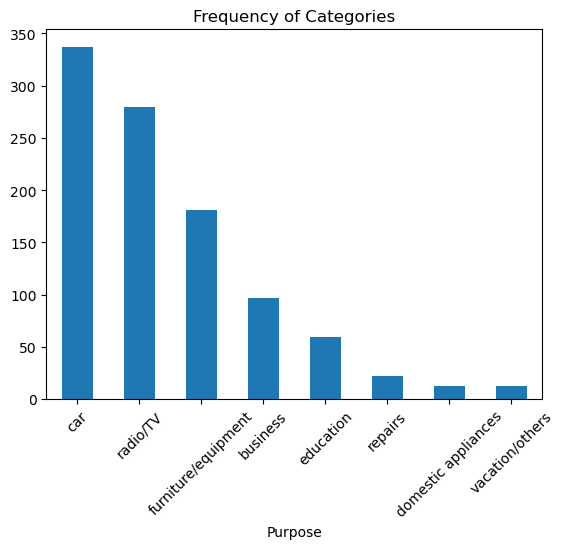

In [21]:
df["Purpose"].value_counts().plot(kind='bar', title='Frequency of Categories')
plt.xticks(rotation=45)
plt.show()

# Observation

- **Outliers** : there is one outliers in **Credit amount** we can remove it or keep it,  for now we are keeping it
- **Missing values** : Checking Account and Saving Account both has missing values so either we can use label **"Unknown"** for that or
                       Classify using **KNN**.
- **Scaling** : required.
- **Encoding** : required since we have many categorical columns.